In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob
import pickle

In [ ]:
with open('/content/drive/MyDrive/통계 빅데이터 공모전/data/real_최종.pickle', 'rb') as f:
    df = pickle.load(f)

In [ ]:
df.head(5)

,인허가일자,영업상태명,폐업일자,소재지수정,사업장명,좌표정보(X),좌표정보(Y),다중이용업소여부,시설총규모,추정임대료,...,점포수_x,유사_업종_점포_수_x,개업_율_x,폐업_률_x,프랜차이즈_점포_수_x,학교_수_x,선행종합지수(2015=100),전국,소비자심리지수,소기업
0,2017-01-02,폐업,20180725,서울특별시 중구 을지로6가 18-12,면면,200703.625559,451836.458257,N,29.88,1.129464e+09,...,273.0,200.0,2.0,2.0,19.0,0.0,107.2,97.632,94.0,4.6
1,2017-01-02,폐업,20180404,서울특별시 용산구 이태원동 44-17,메그놀리아디자인카페,199117.051682,447830.318353,N,72.99,7.554465e+08,...,93.0,52.0,14.0,4.0,7.0,2.0,107.2,97.632,94.0,4.6
2,2017-01-02,영업/정상,NaN,서울특별시 성동구 행당동 286-43,백채왕십리역점,202866.561868,451003.516900,N,36.61,3.060596e+08,...,15.0,11.0,9.0,0.0,3.0,0.0,107.2,97.632,94.0,4.6
3,2017-01-02,영업/정상,NaN,서울특별시 성동구 성수동2가 289-5,우리푸드,205005.412996,449496.502512,N,126.46,1.018635e+09,...,211.0,131.0,1.0,2.0,16.0,0.0,107.2,97.632,94.0,4.6
4,2017-01-02,폐업,20170920,서울특별시 동대문구 장안동 374-1,일촌김밥분식,206009.495098,451806.846263,N,47.94,4.268578e+08,...,62.0,33.0,0.0,3.0,1.0,0.0,107.2,97.632,94.0,4.6


In [ ]:
df29= df.iloc[:,:29]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# 한글폰트 설정


In [ ]:
# 안되면 런타임 재시작하고 다시 시작
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 체크해보면 폰트 개수가 늘어났다
import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts

In [ ]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.13
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [ ]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
sns.set(font=font_name, 
rc={"axes.unicode_minus":False}, style='white')

# 진짜 데이터 분석


In [ ]:
df29.columns

Index(['인허가일자', '영업상태명', '폐업일자', '소재지수정', '사업장명', '좌표정보(X)', '좌표정보(Y)',
       '다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '업종분류', '인허가년도', '인허가분기', '사업기간',
       '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드', '번호', '상권배후지 상권코드',
       'Unnamed: 0_x_x', '시군구_코드_x', '시군구_코드_명_x', '상권_변화_지표_명_x',
       '상권_구분_코드_명_x', '행정동_코드_x', '집객시설_수_x'],
      dtype='object')

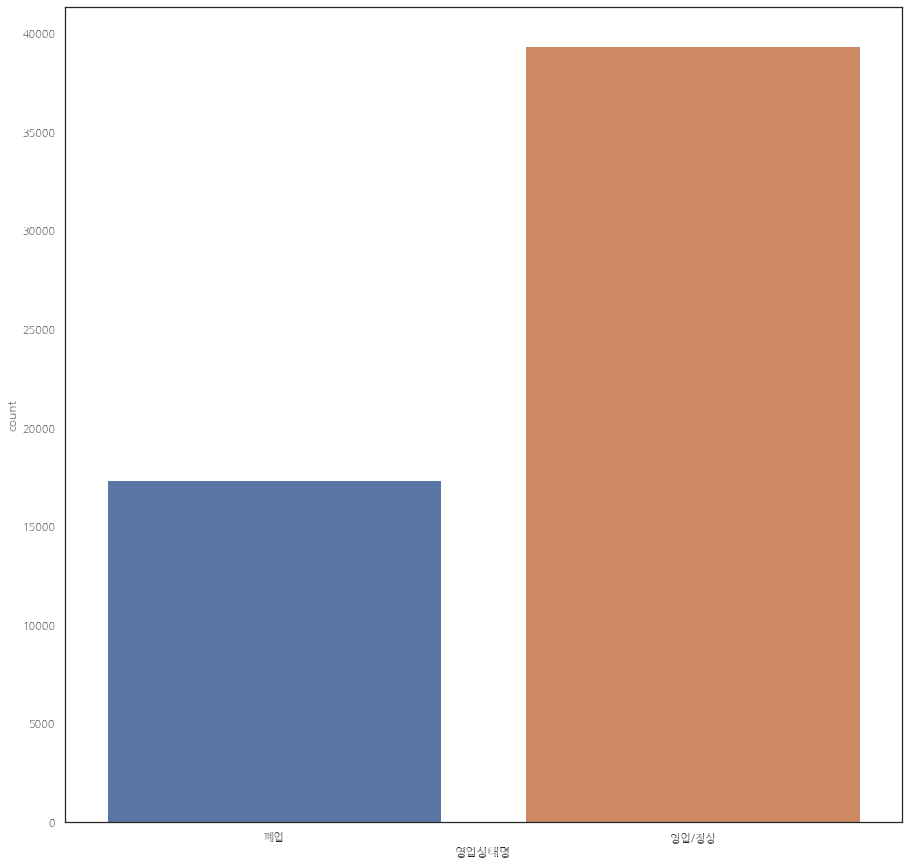

In [ ]:
# 영업상태명 플랏
sns.countplot(x='영업상태명',data=df29)

In [ ]:
df29['폐업일자'] = pd.to_datetime(df29['폐업일자'])

In [ ]:
print(df29[df29['폐업일자'].notnull()]['폐업일자'].max())
print(df29[df29['폐업일자'].notnull()]['폐업일자'].min())

2022-05-27 00:00:00
2017-01-16 00:00:00


In [ ]:
df29['소재지수정']

0         서울특별시 중구 을지로6가 18-12
1         서울특별시 용산구 이태원동 44-17
2         서울특별시 성동구 행당동 286-43
3        서울특별시 성동구 성수동2가 289-5
4         서울특별시 동대문구 장안동 374-1
                 ...          
56720     서울특별시 강동구 명일동 326-11
56721      서울특별시 강동구 강일동 679-3
56722      서울특별시 강남구 신사동 648-4
56723      서울특별시 강남구 신사동 644-6
56724      서울특별시 강동구 길동 325-14
Name: 소재지수정, Length: 56725, dtype: object

In [ ]:
df29[['서울','시군구','행정동','기타']]= pd.DataFrame(df29.소재지수정.str.split(' ',3).tolist())

In [ ]:
df29= df29.drop(columns=['서울','기타','좌표정보(X)','좌표정보(Y)','시군구_코드_명_x']) # 필요없는 칼럼 제거

In [ ]:
df29.isnull().sum()

인허가일자                 0
영업상태명                 0
폐업일자              39379
소재지수정                 0
사업장명                  1
다중이용업소여부              0
시설총규모                 0
추정임대료                 0
가맹여부                  0
업종분류                  0
인허가년도                 0
인허가분기                 0
사업기간              39379
폐업1년이내                0
폐업3년이내                0
폐업여부                  0
코로나여부                 0
상권코드                  0
번호                    0
상권배후지 상권코드            0
Unnamed: 0_x_x     6709
시군구_코드_x           6709
상권_변화_지표_명_x       6709
상권_구분_코드_명_x       6709
행정동_코드_x           6709
집객시설_수_x           7740
시군구                   0
행정동                   0
dtype: int64

In [ ]:
df29.loc[:,['행정동_코드_x','행정동']]

,행정동_코드_x,행정동
0,11140590,을지로6가
1,11170650,이태원동
2,11200560,행당동
3,11200690,성수동2가
4,11230650,장안동
...,...,...
56720,11740530,명일동
56721,11740560,강일동
56722,11680545,신사동
56723,11680545,신사동


In [ ]:
사업장명 = pd.DataFrame(df29['사업장명'].value_counts()) 
사업장명 = 사업장명.rename(columns={'사업장명':'지점개수'})

In [ ]:
사업장명[사업장명['지점개수']>1] # 즉 지점이 하나이상있는 상점이 3871개 있다.
# 지점개수 칼럼을 새로 만들어야할 필요가 있다.

,지점개수
옛날통닭,54
아지트,32
한국통닭,23
랍스터바,20
전주식당,19
...,...
주니푸드,2
기후,2
소담칼국수,2
쥬스혁명,2


In [ ]:
# 다중이용업소에 해당하면 1아니면 0으로 변경
YesOrNo = {'Y':1,'N':0}
df29['다중이용업소여부']= df.다중이용업소여부.map(YesOrNo)

In [ ]:
df29

,인허가일자,영업상태명,폐업일자,소재지수정,사업장명,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,...,번호,상권배후지 상권코드,Unnamed: 0_x_x,시군구_코드_x,상권_변화_지표_명_x,상권_구분_코드_명_x,행정동_코드_x,집객시설_수_x,시군구,행정동
0,2017-01-02,폐업,2018-07-25,서울특별시 중구 을지로6가 18-12,면면,0,29.88,1.129464e+09,0,한식음식점,...,0,0,9990,11140,정체,발달상권,11140590,113.0,중구,을지로6가
1,2017-01-02,폐업,2018-04-04,서울특별시 용산구 이태원동 44-17,메그놀리아디자인카페,0,72.99,7.554465e+08,0,커피-음료,...,1,2110082,9976,11170,정체,골목상권,11170650,97.0,용산구,이태원동
2,2017-01-02,영업/정상,NaT,서울특별시 성동구 행당동 286-43,백채왕십리역점,0,36.61,3.060596e+08,1,한식음식점,...,2,0,9234,11200,상권확장,골목상권,11200560,9.0,성동구,행당동
3,2017-01-02,영업/정상,NaT,서울특별시 성동구 성수동2가 289-5,우리푸드,0,126.46,1.018635e+09,0,한식음식점,...,3,0,9289,11200,상권확장,발달상권,11200690,61.0,성동구,성수동2가
4,2017-01-02,폐업,2017-09-20,서울특별시 동대문구 장안동 374-1,일촌김밥분식,0,47.94,4.268578e+08,0,한식음식점,...,4,0,8271,11230,정체,골목상권,11230650,8.0,동대문구,장안동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56720,2021-12-30,영업/정상,NaT,서울특별시 강동구 명일동 326-11,주식회사더크레스트명일지점,1,153.75,9.412575e+08,0,한식음식점,...,59320,0,187887,11740,다이나믹,골목상권,11740530,13.0,강동구,명일동
56721,2021-12-30,영업/정상,NaT,서울특별시 강동구 강일동 679-3,곽만근족발슈바인학센강일고덕점,0,37.24,2.267916e+08,1,한식음식점,...,59321,2111088,203265,11740,다이나믹,골목상권,11740560,60.0,강동구,강일동
56722,2021-12-31,영업/정상,NaT,서울특별시 강남구 신사동 648-4,마일하이(Milehigh),1,163.11,2.815279e+09,0,양식음식점,...,59323,0,189029,11680,다이나믹,발달상권,11680545,19.0,강남구,신사동
56723,2021-12-31,영업/정상,NaT,서울특별시 강남구 신사동 644-6,우모크,1,342.66,3.382054e+09,0,한식음식점,...,59324,0,189026,11680,다이나믹,발달상권,11680545,19.0,강남구,신사동


In [ ]:
print("시설총규모 통계값")
print("평균 : {}".format(np.mean(x)))
print("최댓값 : {}".format(np.max(x)))
print("최솟값 : {}".format(np.min(x)))

시설총규모 통걔값
평균 : 60.9047871797489
최댓값 : 593.0
최솟값 : 1.0


(0.0, 700.0)

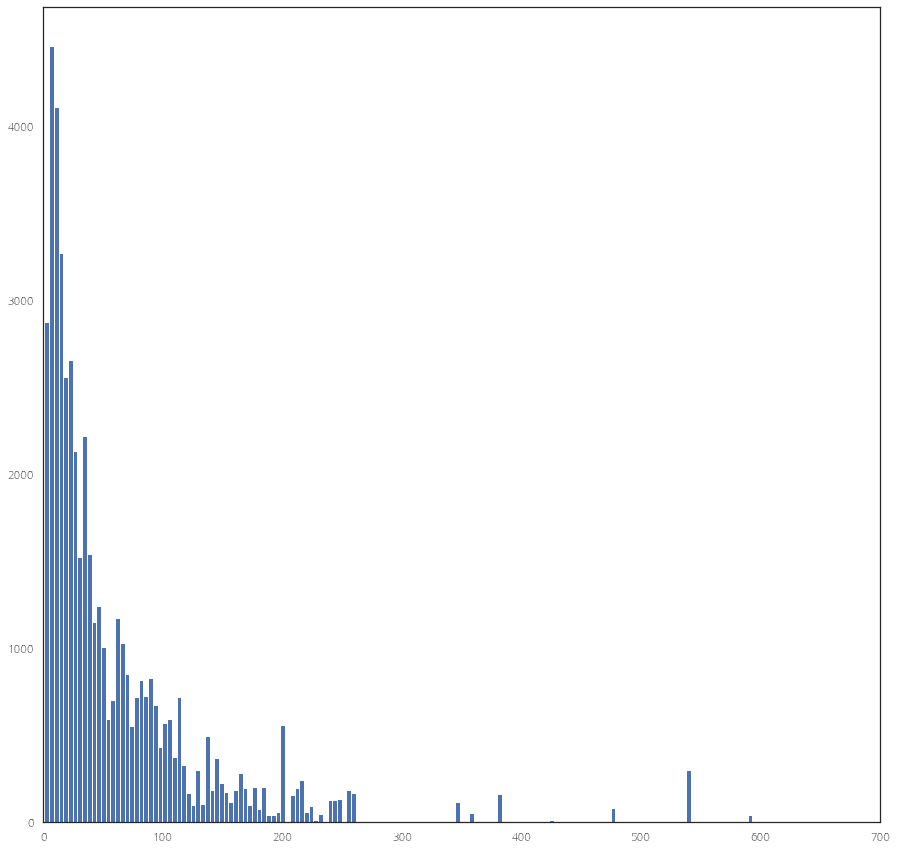

In [ ]:
plt.hist(x,bins=150)
plt.xlim(0,700)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


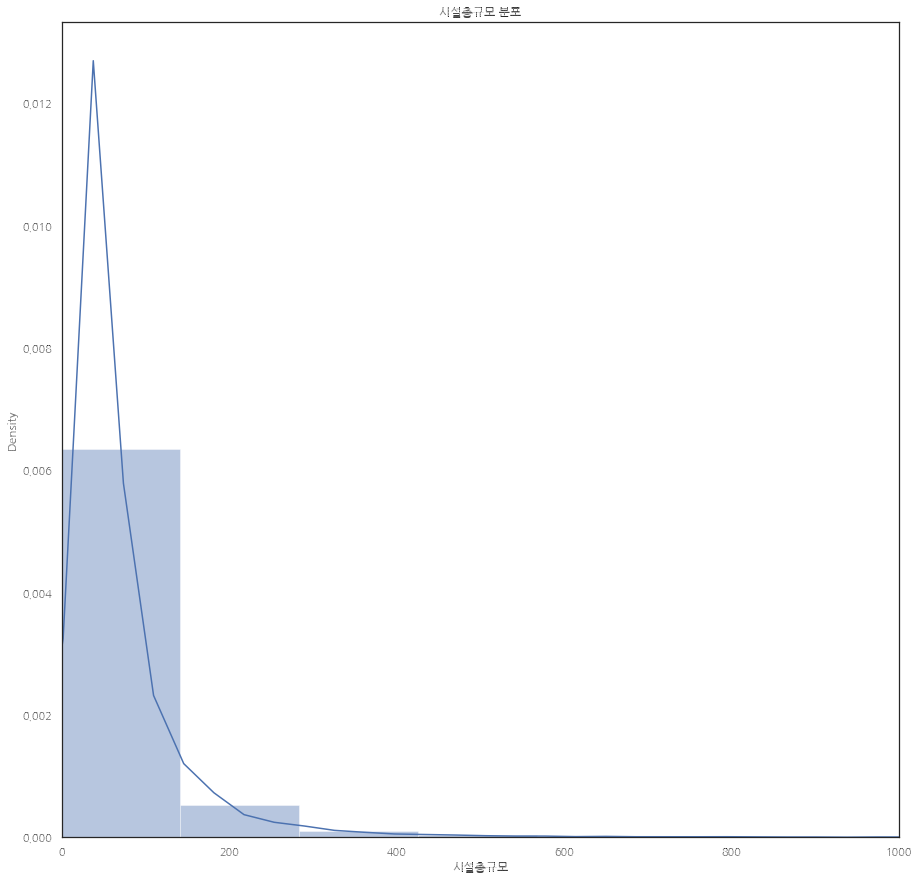

In [ ]:
sns.distplot(df29.loc[df29['시설총규모'].notnull(), '시설총규모'])
plt.title('시설총규모 분포')
plt.rcParams['figure.figsize'] = [13, 13]
plt.xlim(0,1000)
plt.show()

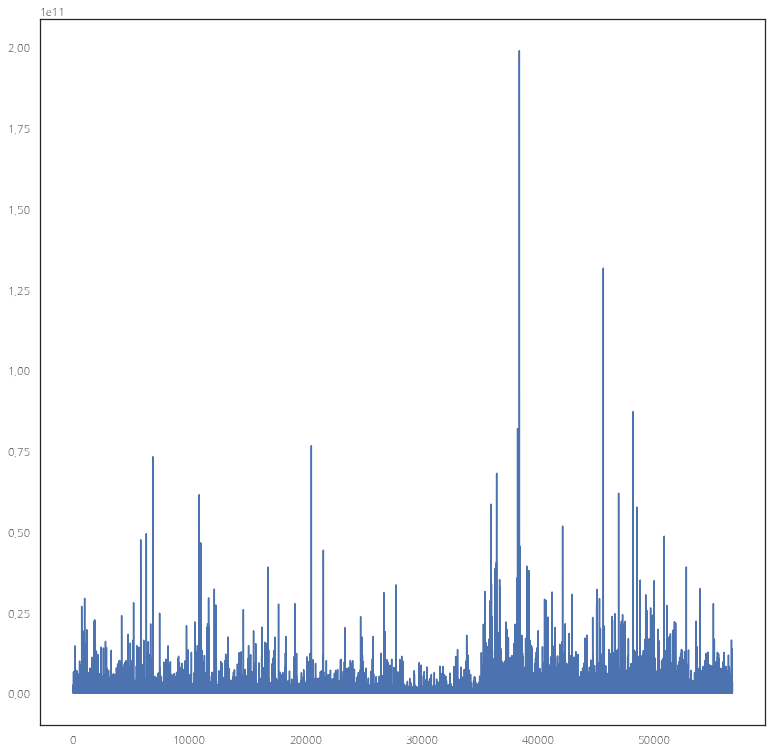

In [ ]:
df29['추정임대료'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


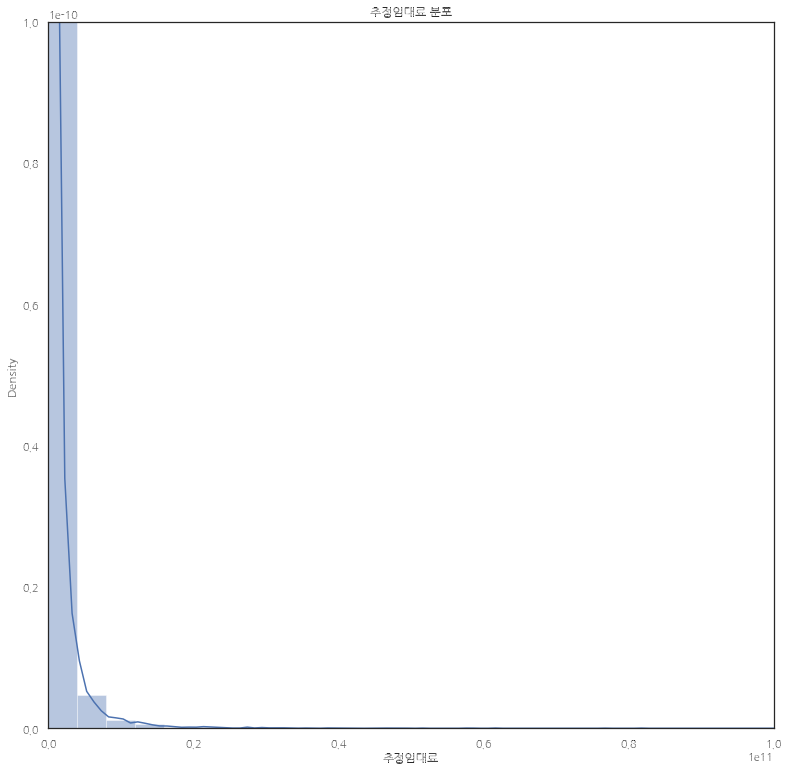

In [ ]:
sns.distplot(df29.loc[df29['추정임대료'].notnull(), '추정임대료'])
plt.title('추정임대료 분포')
plt.rcParams['figure.figsize'] = [13, 13]
plt.xlim(0,1e+11)
plt.ylim(0,1e-10)
plt.show()

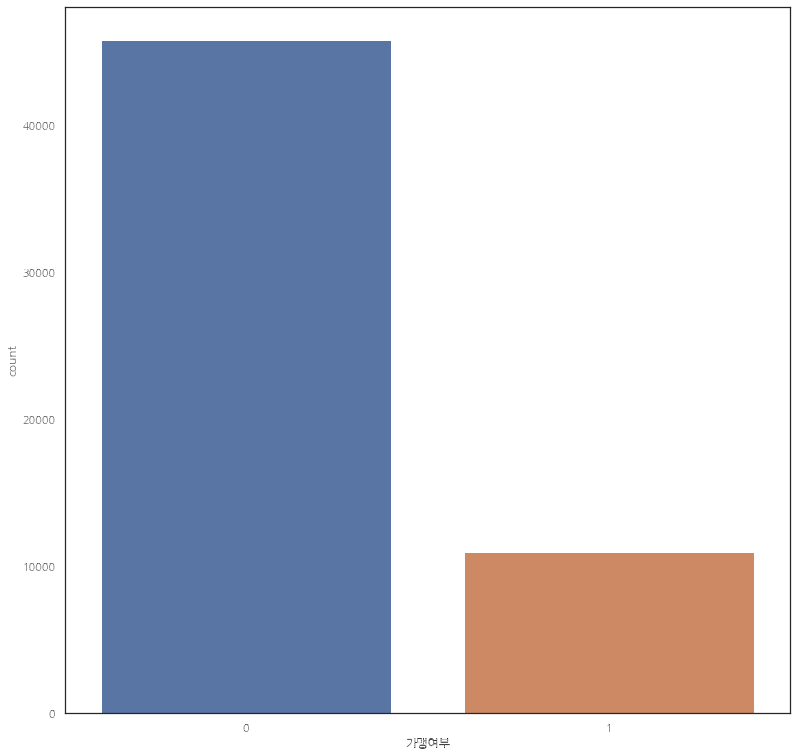

In [ ]:
sns.countplot(x='가맹여부',data=df29)

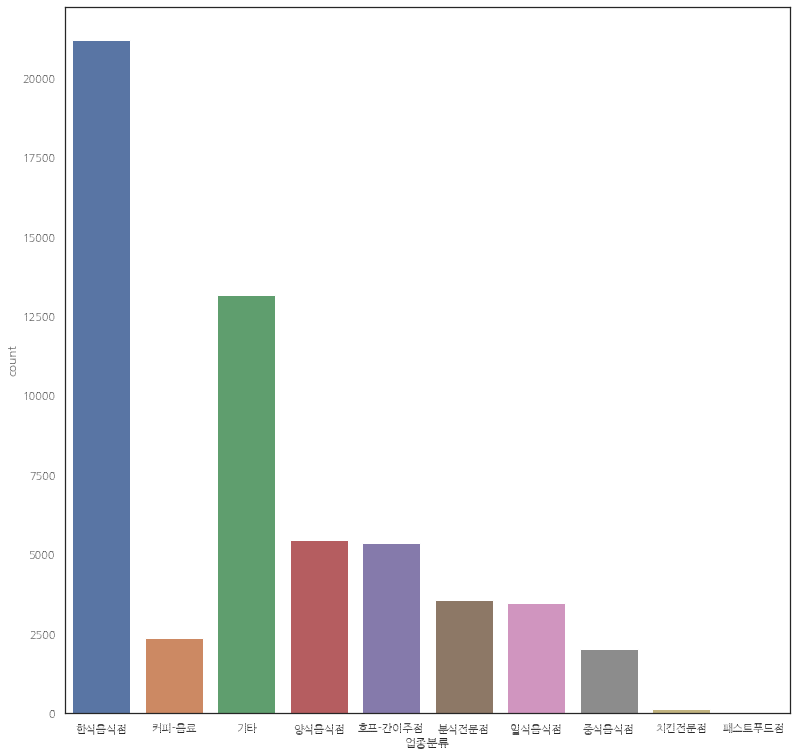

In [ ]:
sns.countplot(x='업종분류',data=df29)

In [ ]:
df29['업종분류'].value_counts()/len(df29)

한식음식점      0.373222
기타         0.232120
양식음식점      0.096342
호프-간이주점    0.094509
분식전문점      0.062900
일식음식점      0.061260
커피-음료      0.041692
중식음식점      0.035734
치킨전문점      0.002204
패스트푸드점     0.000018
Name: 업종분류, dtype: float64

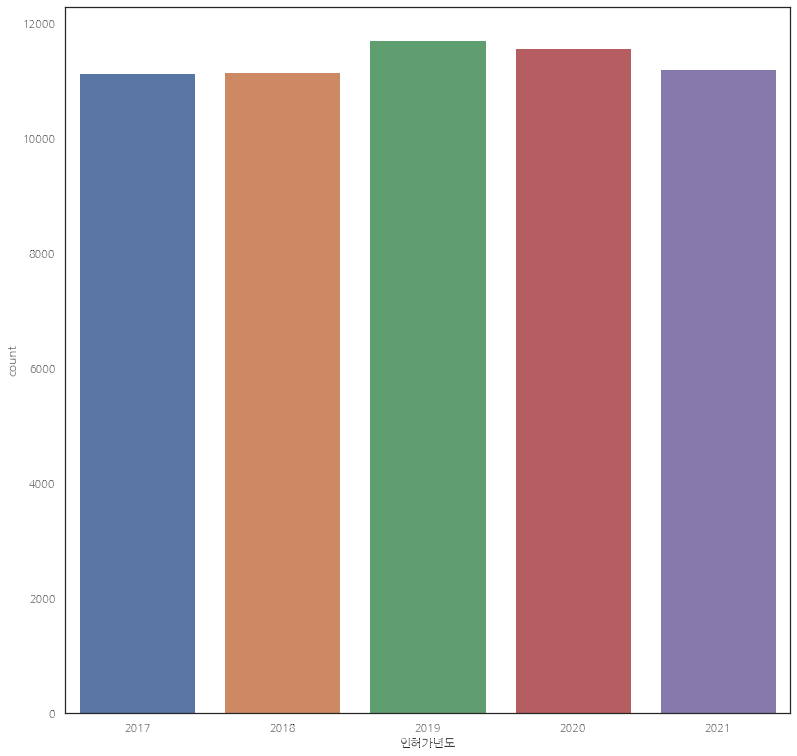

In [ ]:
sns.countplot(x='인허가년도',data=df29)

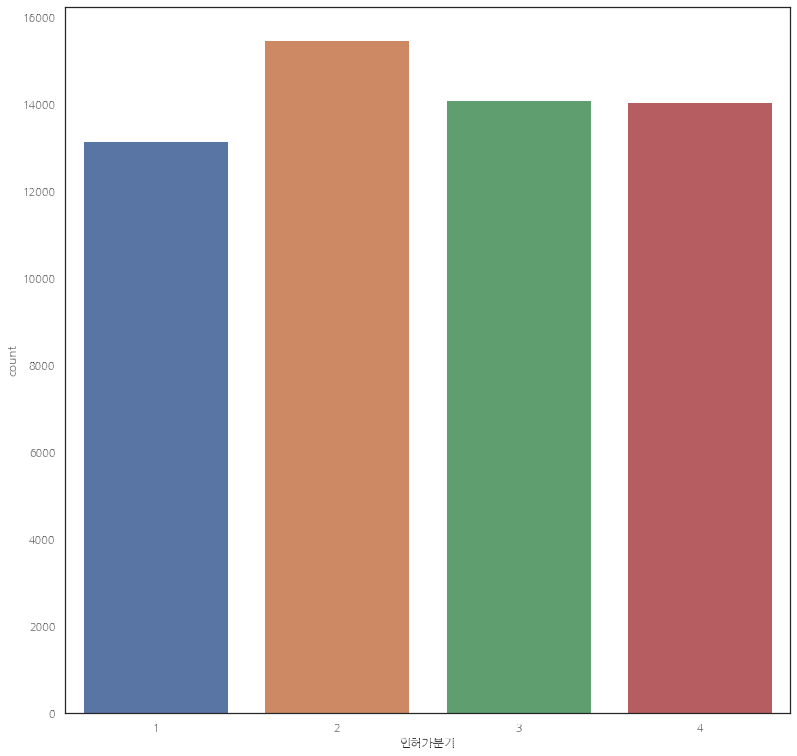

In [ ]:
sns.countplot(x='인허가분기',data=df29)

In [ ]:
df29.loc[:,'사업기간'].isnull().sum()/len(df29) # 사업기간 데이터의 결측비율이 69퍼센트이다.
# 아직 폐업하지 않은 업체는 사업기간이 측정되지 않았다.
# 폐업하지 않은 업체는 nan값인데 이를 어떻게 처리해줄것인가?

0.6942089026002645

In [ ]:
# 폐업한 업체의 사업기간 데이터
x= df29[~df29['사업기간'].isnull()]['사업기간'].tolist()

In [ ]:
print("평균 : {}".format(np.mean(x)))
print("최댓값 : {}".format(np.max(x)))
print("최솟값 : {}".format(np.min(x)))

평균 : 579.3081978554134
최댓값 : 1940.0
최솟값 : 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


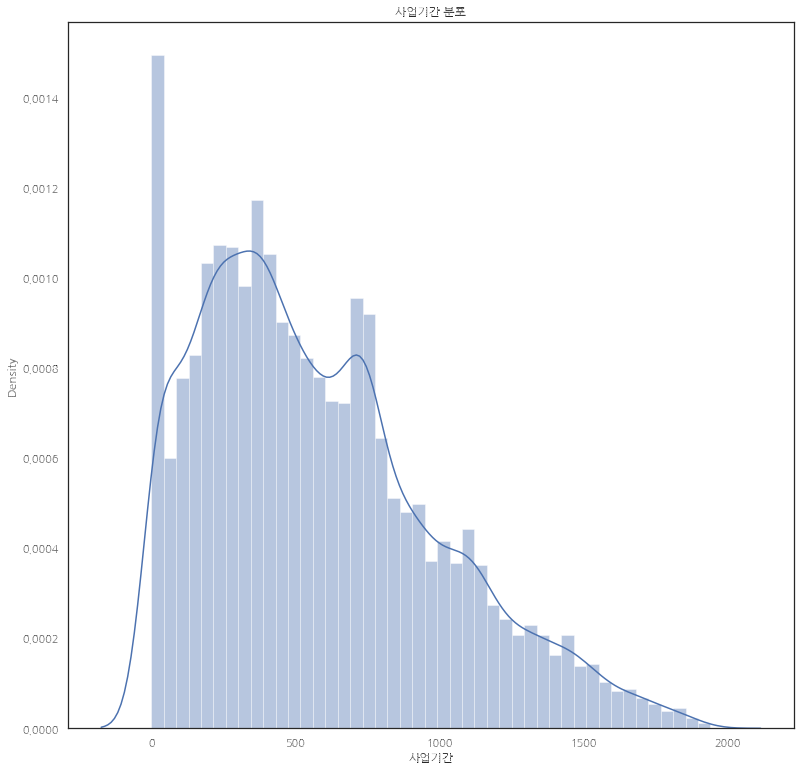

In [ ]:
sns.distplot(df29.loc[df29['사업기간'].notnull(), '사업기간'])
plt.title('사업기간 분포')
plt.rcParams['figure.figsize'] = [13, 13]
plt.show()

In [ ]:
# 폐업된 업체만 사업기간이 되어있다 영업중인 업체는 사업기간을 어떻게 할까

In [ ]:
df29[df29['사업기간']==0] # 이런 사업기간이 0인 데이터는 어떻게 처리하는게 좋을까
# 총 18개의 업체가 있음

,인허가일자,영업상태명,폐업일자,소재지수정,사업장명,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,...,번호,상권배후지 상권코드,Unnamed: 0_x_x,시군구_코드_x,상권_변화_지표_명_x,상권_구분_코드_명_x,행정동_코드_x,집객시설_수_x,시군구,행정동
11010,2018-07-26,폐업,2018-07-26,서울특별시 강서구 화곡동 777-11,광마,0,92.69,4.279497e+08,0,양식음식점,...,11494,0,NaN,NaN,NaN,NaN,NaN,NaN,강서구,화곡동
13609,2018-12-07,폐업,2018-12-07,서울특별시 양천구 신월동 114-9,애플앤치킨,0,130.99,4.964521e+08,0,호프-간이주점,...,14190,0,78106,11470,다이나믹,골목상권,11470560,15.0,양천구,신월동
15296,2019-03-15,폐업,2019-03-15,서울특별시 성북구 동선동1가 27,싸이렌떡볶이&치킨,0,33.06,2.140304e+08,0,분식전문점,...,15979,0,90825,11290,정체,골목상권,11290600,23.0,성북구,동선동1가
15587,2019-03-28,폐업,2019-03-28,서울특별시 광진구 화양동 111-102,커피인글러브,0,35.84,4.487168e+08,0,커피-음료,...,16286,2130079,NaN,NaN,NaN,NaN,NaN,NaN,광진구,화양동
17911,2019-07-15,폐업,2019-07-15,서울특별시 종로구 동숭동 13-2,계절의연음,0,39.82,1.486481e+08,0,한식음식점,...,18748,0,112635,11110,정체,발달상권,11110650,128.0,종로구,동숭동
18819,2019-08-30,폐업,2019-08-30,서울특별시 양천구 신월동 912-14,하랑,0,26.00,9.063600e+07,0,한식음식점,...,19711,0,107334,11470,다이나믹,골목상권,11470611,27.0,양천구,신월동
25619,2020-08-18,폐업,2020-08-18,서울특별시 강서구 마곡동 797-14,아모리,0,53.23,3.909211e+08,0,중식음식점,...,26899,2110650,154706,11500,다이나믹,골목상권,11500615,73.0,강서구,마곡동
25620,2020-08-18,폐업,2020-08-18,서울특별시 강서구 마곡동 797-14,아모르,0,87.36,6.415718e+08,0,한식음식점,...,26900,2110650,154705,11500,다이나믹,골목상권,11500615,73.0,강서구,마곡동
26898,2020-10-21,폐업,2020-10-21,서울특별시 중구 남창동 50-48,본커피,0,60.00,1.236000e+09,0,커피-음료,...,28281,0,159438,11140,정체,발달상권,11140540,101.0,중구,남창동
32319,2021-07-13,폐업,2021-07-13,서울특별시 은평구 응암동 81-173,응암종합어시장,0,70.60,3.685320e+08,0,기타,...,34001,2110488,198373,11380,다이나믹,골목상권,11380580,94.0,은평구,응암동


In [ ]:
df29.loc[:,["폐업1년이내","폐업3년이내","폐업여부"]]

,폐업1년이내,폐업3년이내,폐업여부
0,0,1,1
1,0,1,1
2,0,0,0
3,0,0,0
4,1,1,1
...,...,...,...
56720,0,0,0
56721,0,0,0
56722,0,0,0
56723,0,0,0


In [ ]:
# 1년이내에 폐업한 업체의 비율
df29['폐업1년이내'].sum()/len(df29)

0.11116791538122521

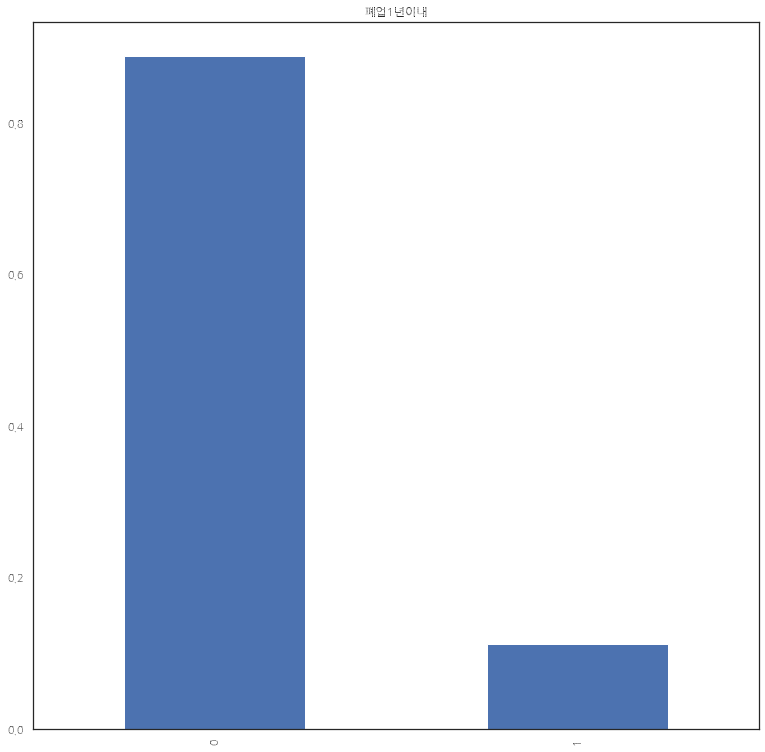

In [ ]:
x = df29['폐업1년이내'].value_counts()/56725
x.plot(kind='bar',title = "폐업1년이내")
plt.show()

In [ ]:
# 3년이내에 폐업한 업체의 비율
df29['폐업3년이내'].sum()/len(df29)

0.2668664609960335

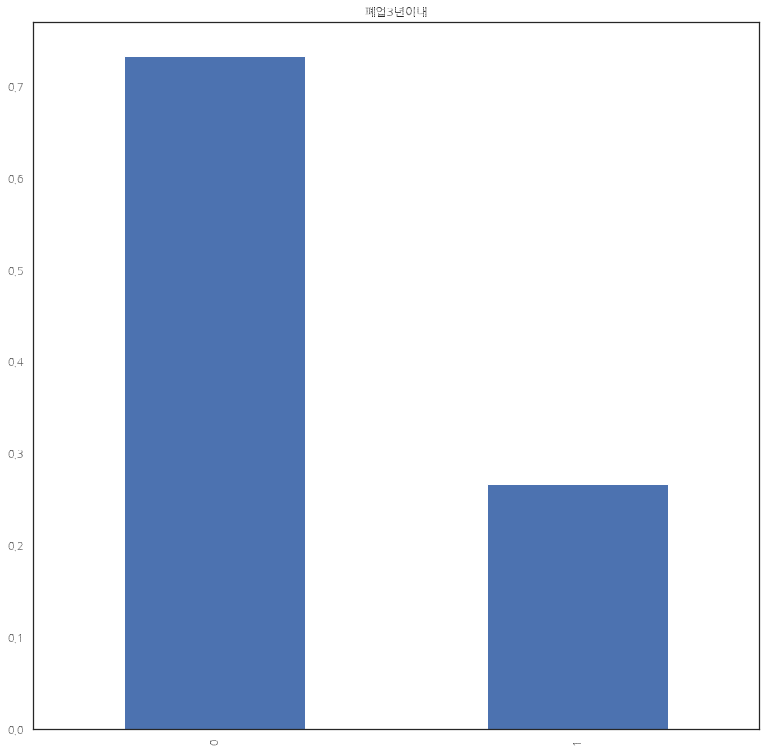

In [ ]:
x = df29['폐업3년이내'].value_counts()/56725
x.plot(kind='bar',title = "폐업3년이내")
plt.show()

In [ ]:
# 3년이상 장사한 후에 폐업한 업체도 합한 비율
df29['폐업여부'].sum()/len(df29)

0.3057910973997356

In [ ]:
df29[df29['폐업여부']==1].loc[:,["폐업1년이내","폐업3년이내","폐업여부"]]

,폐업1년이내,폐업3년이내,폐업여부
0,0,1,1
1,0,1,1
4,1,1,1
8,0,0,1
9,0,0,1
...,...,...,...
56653,1,1,1
56678,1,1,1
56700,1,1,1
56704,1,1,1


코로나 시기에 폐업한 업체 비율 : 0.38623182018510355


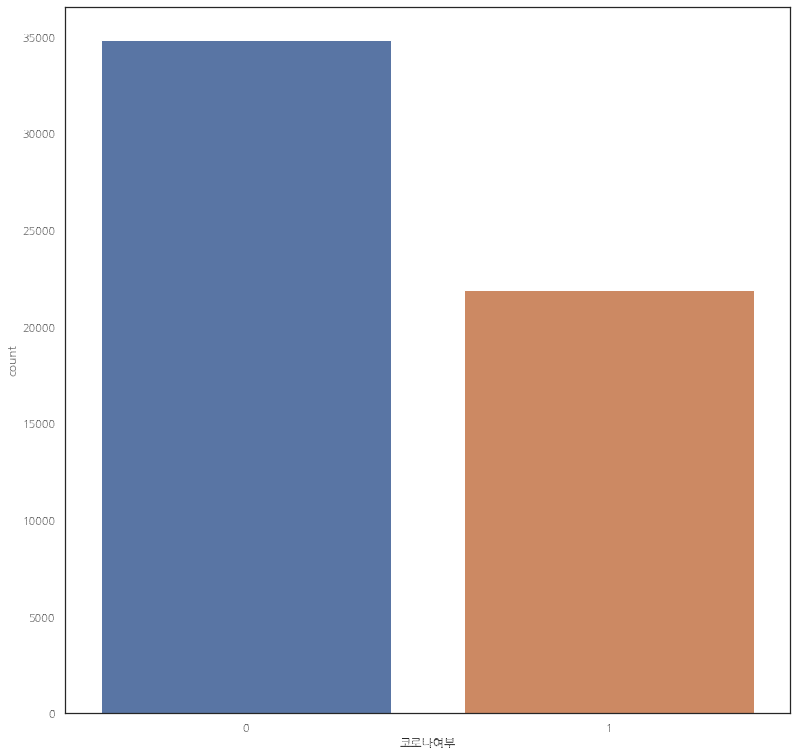

In [ ]:
sns.countplot(x='코로나여부',data=df29)
print("코로나 시기에 폐업한 업체 비율 : {}".format(df29['코로나여부'].sum()/len(df29)))

In [ ]:
df29.loc[:,'상권코드':]

,상권코드,번호,상권배후지 상권코드,Unnamed: 0_x_x,시군구_코드_x,상권_변화_지표_명_x,상권_구분_코드_명_x,행정동_코드_x,집객시설_수_x,시군구,행정동
0,2120037,0,0,9990,11140,정체,발달상권,11140590,113.0,중구,을지로6가
1,0,1,2110082,9976,11170,정체,골목상권,11170650,97.0,용산구,이태원동
2,2110112,2,0,9234,11200,상권확장,골목상권,11200560,9.0,성동구,행당동
3,2120052,3,0,9289,11200,상권확장,발달상권,11200690,61.0,성동구,성수동2가
4,2110229,4,0,8271,11230,정체,골목상권,11230650,8.0,동대문구,장안동
...,...,...,...,...,...,...,...,...,...,...,...
56720,2111080,59320,0,187887,11740,다이나믹,골목상권,11740530,13.0,강동구,명일동
56721,0,59321,2111088,203265,11740,다이나믹,골목상권,11740560,60.0,강동구,강일동
56722,2120193,59323,0,189029,11680,다이나믹,발달상권,11680545,19.0,강남구,신사동
56723,2120193,59324,0,189026,11680,다이나믹,발달상권,11680545,19.0,강남구,신사동


In [ ]:
# 필요없는 칼럼 drop
# df29=df29.drop(columns='번호')
df29=df29.drop(columns='Unnamed: 0_x_x')

In [ ]:
# 상권 배후지
df29['상권코드'] = df29['상권코드'].replace({0:np.nan})
df29['상권배후지 상권코드'] = df29['상권배후지 상권코드'].replace({0:np.nan})

In [ ]:
# 상권코드 결측 비율
df29['상권코드'].isnull().sum()/len(df29)

0.15906566769501984

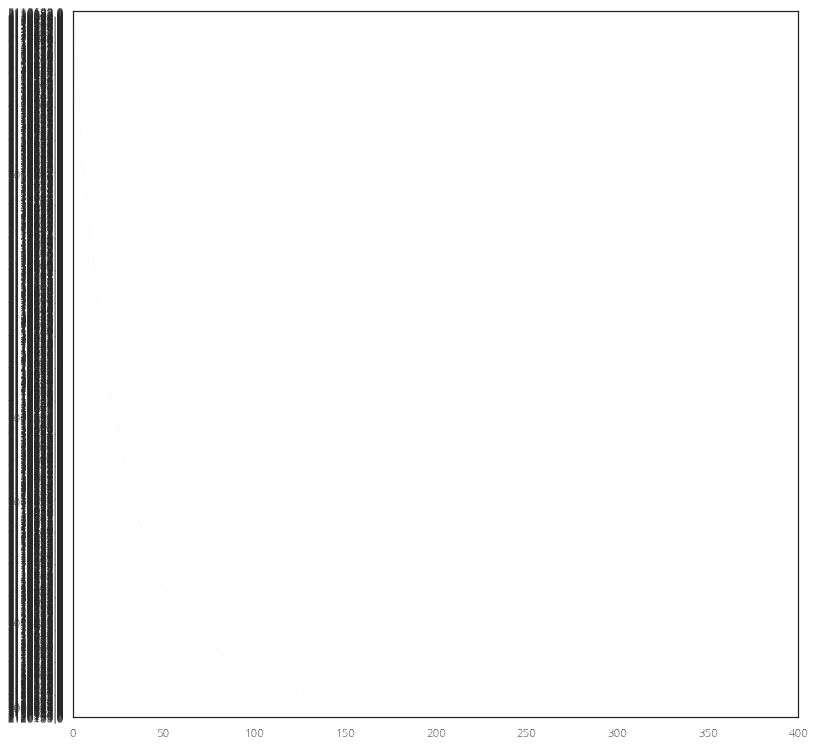

In [ ]:
df29['상권코드'].value_counts().plot(kind='barh',xlim=(0,400))

In [ ]:
print("상권 내 업체 개수 max : {}".format(df29['상권코드'].value_counts().max()))
print("상권 내 업체 개수 min : {}".format(df29['상권코드'].value_counts().min()))
print("상권 내 업체 개수 mean : {}".format(df29['상권코드'].value_counts().mean()))

상권 내 업체 개수 max : 546
상권 내 업체 개수 min : 1
상권 내 업체 개수 mean : 33.2418118466899


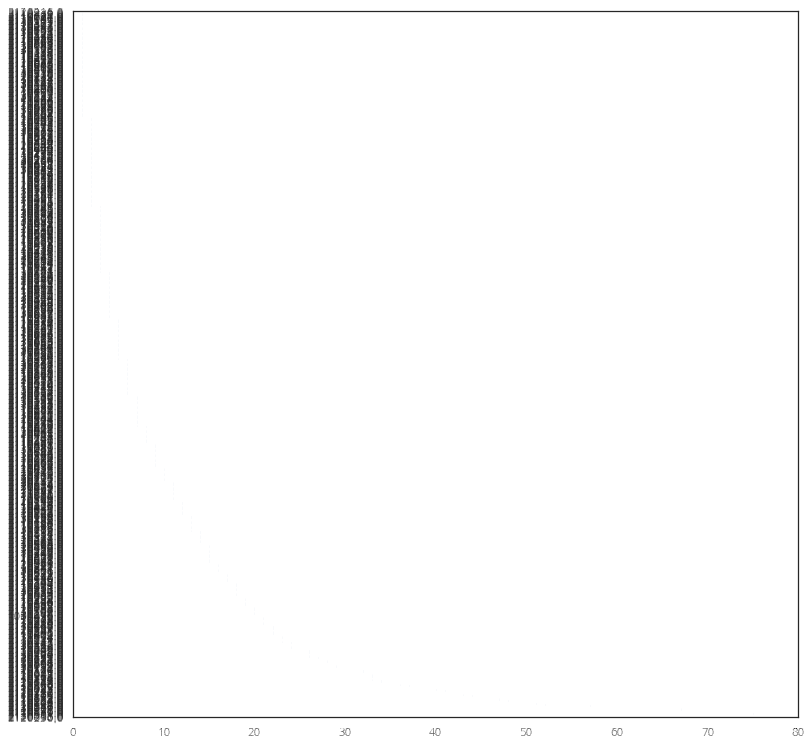

In [ ]:
df29['상권배후지 상권코드'].value_counts().plot(kind='barh',xlim=(0,80))

In [ ]:
print("상권배후지 내 업체 개수 max : {}".format(df29['상권배후지 상권코드'].value_counts().max()))
print("상권배후지 내 업체 개수 min : {}".format(df29['상권배후지 상권코드'].value_counts().min()))
print("상권배후지 내 업체 개수 mean : {}".format(df29['상권배후지 상권코드'].value_counts().mean()))

상권배후지 내 업체 개수 max : 128
상권배후지 내 업체 개수 min : 1
상권배후지 내 업체 개수 mean : 10.565573770491802


In [ ]:
df29 = df29.rename(columns={"시군구_코드_x":"시군구코드","상권_변화_지표_명_x":"상권변화_지표명","상권_구분_코드_명_x":"상권구분_코드명","행정동_코드_x":"행정동코드","집객시설_수_x":"집객시설_수"})

In [ ]:
df29.loc[:,"시군구코드":]

,시군구코드,상권변화_지표명,상권구분_코드명,행정동코드,집객시설_수,시군구,행정동
0,11140,정체,발달상권,11140590,113.0,중구,을지로6가
1,11170,정체,골목상권,11170650,97.0,용산구,이태원동
2,11200,상권확장,골목상권,11200560,9.0,성동구,행당동
3,11200,상권확장,발달상권,11200690,61.0,성동구,성수동2가
4,11230,정체,골목상권,11230650,8.0,동대문구,장안동
...,...,...,...,...,...,...,...
56720,11740,다이나믹,골목상권,11740530,13.0,강동구,명일동
56721,11740,다이나믹,골목상권,11740560,60.0,강동구,강일동
56722,11680,다이나믹,발달상권,11680545,19.0,강남구,신사동
56723,11680,다이나믹,발달상권,11680545,19.0,강남구,신사동


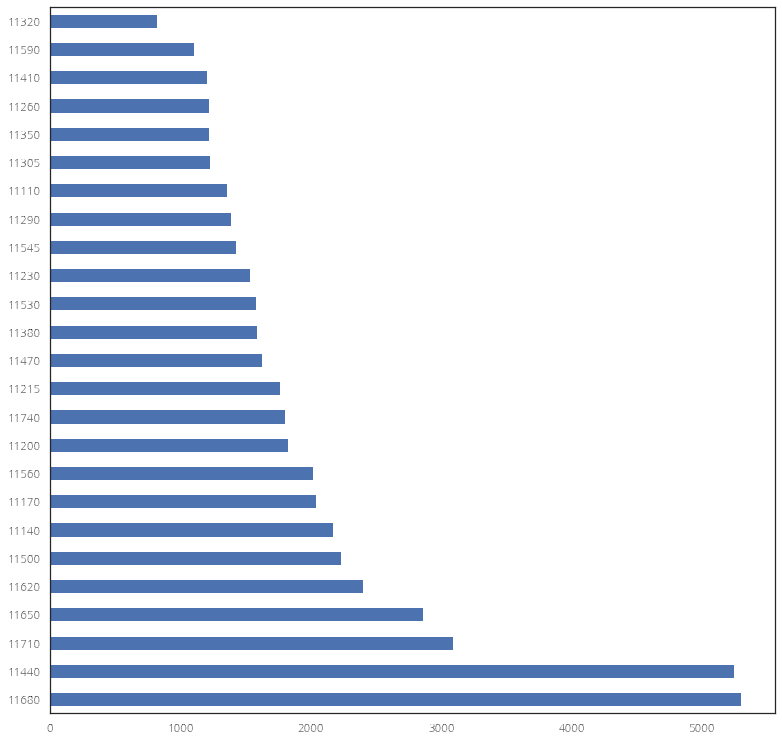

In [ ]:
df29['시군구코드'].value_counts().plot(kind='barh')

In [ ]:
print("시군구 내 업체 개수 max : {}".format(df29['시군구코드'].value_counts().max()))
print("시군구 내 업체 개수 min : {}".format(df29['시군구코드'].value_counts().min()))
print("시군구 내 업체 개수 mean : {}".format(df29['시군구코드'].value_counts().mean()))

시군구 내 업체 개수 max : 5293
시군구 내 업체 개수 min : 823
시군구 내 업체 개수 mean : 2000.64


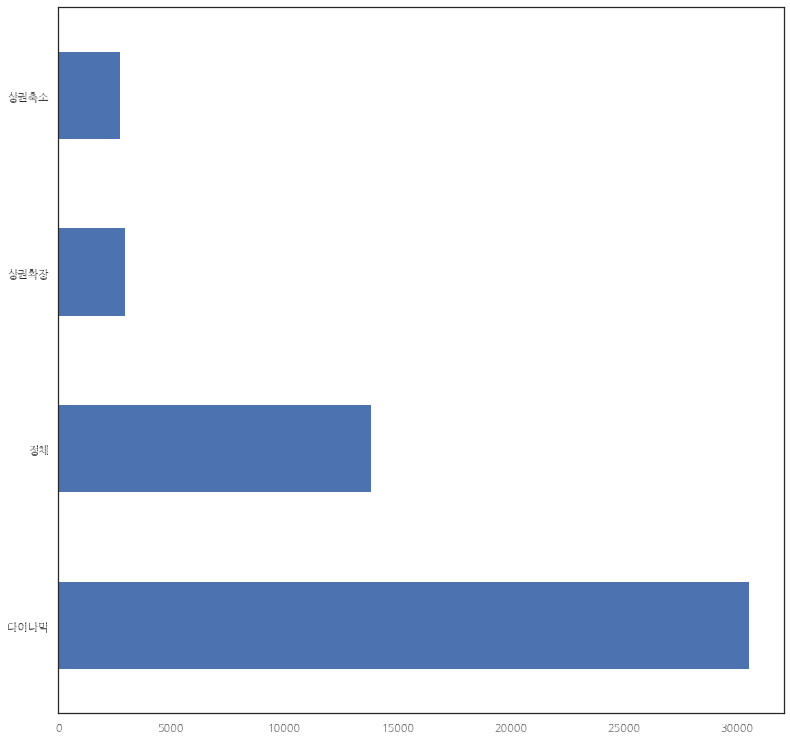

In [ ]:
df29['상권변화_지표명'].value_counts().plot(kind='barh')

In [ ]:
# 상권변화_지표명 결측 비율
df29['상권변화_지표명'].isnull().sum()/len(df29)

0.11827236668135743

In [ ]:
# 상권변화_지표명 비율
df29['상권변화_지표명'].value_counts()/len(df29)

다이나믹    0.538193
정체      0.243667
상권확장    0.052093
상권축소    0.047774
Name: 상권변화_지표명, dtype: float64

In [ ]:
# 집객시설수 분포
x= df29[~df29['집객시설_수'].isnull()]['집객시설_수'].tolist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


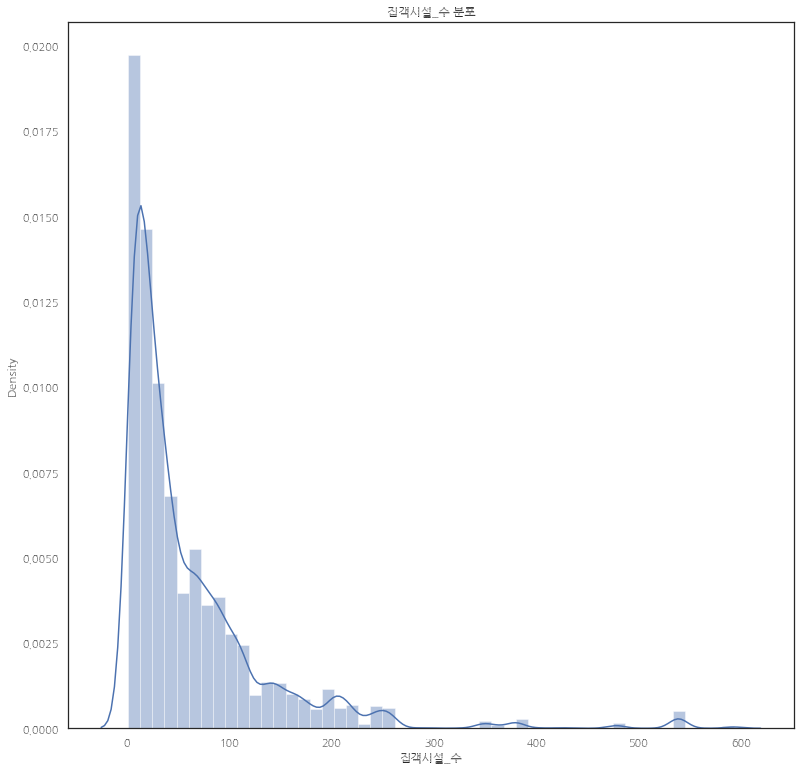

평균 : 60.9047871797489
최댓값 : 593.0
최솟값 : 1.0


In [ ]:
# 차후에 상권,상권배후지 로 나눠서 다시한번확인해야함
sns.distplot(df29.loc[df29['집객시설_수'].notnull(), '집객시설_수'])
plt.title('집객시설_수 분포')
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

print("평균 : {}".format(np.mean(x)))
print("최댓값 : {}".format(np.max(x)))
print("최솟값 : {}".format(np.min(x)))

In [ ]:
# 상권, 상권배후지임을 나타내는 변수 추가하기

In [ ]:
df29.loc[:,['상권코드','상권배후지 상권코드']]

,상권코드,상권배후지 상권코드
0,2120037.0,NaN
1,NaN,2110082.0
2,2110112.0,NaN
3,2120052.0,NaN
4,2110229.0,NaN
...,...,...
56720,2111080.0,NaN
56721,NaN,2111088.0
56722,2120193.0,NaN
56723,2120193.0,NaN


In [ ]:
df29["상권여부"]=df['상권코드'].isnull()

In [ ]:
df29['행정동'].value_counts()

역삼동      1816
신사동      1372
신림동      1367
봉천동      1353
서교동      1258
         ... 
천왕동         1
원지동         1
안암동4가       1
염곡동         1
의주로2가       1
Name: 행정동, Length: 443, dtype: int64

In [ ]:
print("행정동 내 업체 개수 max : {}".format(df29['행정동'].value_counts().max()))
print("행정동 내 업체 개수 min : {}".format(df29['행정동'].value_counts().min()))
print("행정동 내 업체 개수 mean : {}".format(df29['행정동'].value_counts().mean()))

행정동 내 업체 개수 max : 1816
행정동 내 업체 개수 min : 1
행정동 내 업체 개수 mean : 128.04740406320542


In [ ]:
# 상권이면 1, 상권 배후지면 0
df29['상권여부'] = [0 if np.isnan(s) == True else 1 for s in df29['상권코드']] 

In [ ]:
df29.loc[:,['상권코드','상권배후지 상권코드','상권여부']]

,상권코드,상권배후지 상권코드,상권여부
0,2120037.0,NaN,1
1,NaN,2110082.0,0
2,2110112.0,NaN,1
3,2120052.0,NaN,1
4,2110229.0,NaN,1
...,...,...,...
56720,2111080.0,NaN,1
56721,NaN,2111088.0,0
56722,2120193.0,NaN,1
56723,2120193.0,NaN,1


In [ ]:
# df29=df29[['인허가년도', '인허가분기','사업장명','현재영업여부','소재지수정', '다중이용업소여부', '시설총규모', '추정임대료',
#        '가맹여부', '업종분류','인허가일자','폐업일자','사업기간', '폐업1년이내', '폐업3년이내', '폐업여부',
#        '코로나여부', '상권코드', '상권배후지 상권코드', '상권여부', '상권변화_지표명', '상권구분_코드명', '시군구코드', '시군구','행정동코드', '행정동',
#        '집객시설_수']]

In [ ]:
df29['영업상태명']

0           폐업
1           폐업
2        영업/정상
3        영업/정상
4           폐업
         ...  
56720    영업/정상
56721    영업/정상
56722    영업/정상
56723    영업/정상
56724    영업/정상
Name: 영업상태명, Length: 56725, dtype: object

In [ ]:
df29['현재영업여부'] = [0 if s == '폐업' else 1 for s in df29['영업상태명']] 

In [ ]:
df29[['현재영업여부']]

,현재영업여부
0,0
1,0
2,1
3,1
4,0
...,...
56720,1
56721,1
56722,1
56723,1


In [ ]:
df29= df29.drop(columns='영업상태명')

In [ ]:
df29.shape

(56725, 27)

In [ ]:
df29.isnull().sum()

인허가일자             0
소재지수정             0
사업장명              1
다중이용업소여부          0
시설총규모             0
추정임대료             0
가맹여부              0
업종분류              0
인허가년도             0
인허가분기             0
사업기간          39379
폐업1년이내            0
폐업3년이내            0
폐업여부              0
코로나여부             0
상권코드           9023
상권배후지 상권코드    47702
시군구코드          6709
상권변화_지표명       6709
상권구분_코드명       6709
행정동코드          6709
집객시설_수         7740
시군구               0
행정동               0
상권여부              0
현재영업여부            0
dtype: int64

In [ ]:
df29= df29.drop(columns="폐업일자")

In [ ]:
df29.columns

Index(['인허가년도', '인허가분기', '사업장명', '현재영업여부', '소재지수정', '다중이용업소여부', '시설총규모',
       '추정임대료', '가맹여부', '업종분류', '인허가일자', '사업기간', '폐업1년이내', '폐업3년이내', '폐업여부',
       '코로나여부', '상권코드', '상권배후지 상권코드', '상권여부', '상권변화_지표명', '상권구분_코드명', '시군구코드',
       '시군구', '행정동코드', '행정동', '집객시설_수'],
      dtype='object')

In [ ]:
df29.isnull().sum()

인허가일자             0
소재지수정             0
사업장명              1
다중이용업소여부          0
시설총규모             0
추정임대료             0
가맹여부              0
업종분류              0
인허가년도             0
인허가분기             0
사업기간          39379
폐업1년이내            0
폐업3년이내            0
폐업여부              0
코로나여부             0
상권코드           9023
상권배후지 상권코드    47702
시군구코드          6709
상권변화_지표명       6709
상권구분_코드명       6709
행정동코드          6709
집객시설_수         7740
시군구               0
행정동               0
상권여부              0
현재영업여부            0
dtype: int64

In [ ]:
df29['인허가일자'] = pd.to_datetime(df['인허가일자'])

In [ ]:
df29[df29['현재영업여부']==1]['사업기간']

2       NaN
3       NaN
5       NaN
6       NaN
7       NaN
         ..
56720   NaN
56721   NaN
56722   NaN
56723   NaN
56724   NaN
Name: 사업기간, Length: 39379, dtype: float64

In [ ]:
from datetime import datetime
criterion = datetime.strptime("20220630", "%Y%m%d")

In [ ]:
df29['기준']= criterion

In [ ]:
df29['기준']

0       2022-06-30
1       2022-06-30
2       2022-06-30
3       2022-06-30
4       2022-06-30
           ...    
56720   2022-06-30
56721   2022-06-30
56722   2022-06-30
56723   2022-06-30
56724   2022-06-30
Name: 기준, Length: 56725, dtype: datetime64[ns]

In [ ]:
df29['기간'] = df29['기준']-df29['인허가일자']

In [ ]:
df29['기간']=df29['기간'].astype('str').str.split(' ').str[0].astype(float)

In [ ]:
df29['기간']

0        2005.0
1        2005.0
2        2005.0
3        2005.0
4        2005.0
          ...  
56720     182.0
56721     182.0
56722     181.0
56723     181.0
56724     181.0
Name: 기간, Length: 56725, dtype: float64

In [ ]:
df29['사업기간']

0        569.0
1        457.0
2          NaN
3          NaN
4        261.0
         ...  
56720      NaN
56721      NaN
56722      NaN
56723      NaN
56724      NaN
Name: 사업기간, Length: 56725, dtype: float64

In [ ]:
df29['사업기간']=df29['사업기간'].fillna(df29['기간'])

In [ ]:
df29= df29.drop(columns=['기간','기준'])

In [ ]:
df29.isnull().sum()

인허가일자             0
소재지수정             0
사업장명              1
다중이용업소여부          0
시설총규모             0
추정임대료             0
가맹여부              0
업종분류              0
인허가년도             0
인허가분기             0
사업기간              0
폐업1년이내            0
폐업3년이내            0
폐업여부              0
코로나여부             0
상권코드           9023
상권배후지 상권코드    47702
시군구코드          6709
상권변화_지표명       6709
상권구분_코드명       6709
행정동코드          6709
집객시설_수         7740
시군구               0
행정동               0
상권여부              0
현재영업여부            0
dtype: int64

In [ ]:
df29.to_csv('/content/drive/MyDrive/통계 빅데이터 공모전/code/서성서성 서재완/df29.csv',index=False)

In [ ]:
df29 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/code/서성서성 서재완/df29.csv')
df29

,인허가일자,소재지수정,사업장명,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,인허가년도,인허가분기,...,상권배후지 상권코드,시군구코드,상권변화_지표명,상권구분_코드명,행정동코드,집객시설_수,시군구,행정동,상권여부,현재영업여부
0,2017-01-02,서울특별시 중구 을지로6가 18-12,면면,0,29.88,1.129464e+09,0,한식음식점,2017,1,...,NaN,11140.0,정체,발달상권,11140590.0,113.0,중구,을지로6가,1,0
1,2017-01-02,서울특별시 용산구 이태원동 44-17,메그놀리아디자인카페,0,72.99,7.554465e+08,0,커피-음료,2017,1,...,2110082.0,11170.0,정체,골목상권,11170650.0,97.0,용산구,이태원동,0,0
2,2017-01-02,서울특별시 성동구 행당동 286-43,백채왕십리역점,0,36.61,3.060596e+08,1,한식음식점,2017,1,...,NaN,11200.0,상권확장,골목상권,11200560.0,9.0,성동구,행당동,1,1
3,2017-01-02,서울특별시 성동구 성수동2가 289-5,우리푸드,0,126.46,1.018635e+09,0,한식음식점,2017,1,...,NaN,11200.0,상권확장,발달상권,11200690.0,61.0,성동구,성수동2가,1,1
4,2017-01-02,서울특별시 동대문구 장안동 374-1,일촌김밥분식,0,47.94,4.268578e+08,0,한식음식점,2017,1,...,NaN,11230.0,정체,골목상권,11230650.0,8.0,동대문구,장안동,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56720,2021-12-30,서울특별시 강동구 명일동 326-11,주식회사더크레스트명일지점,1,153.75,9.412575e+08,0,한식음식점,2021,4,...,NaN,11740.0,다이나믹,골목상권,11740530.0,13.0,강동구,명일동,1,1
56721,2021-12-30,서울특별시 강동구 강일동 679-3,곽만근족발슈바인학센강일고덕점,0,37.24,2.267916e+08,1,한식음식점,2021,4,...,2111088.0,11740.0,다이나믹,골목상권,11740560.0,60.0,강동구,강일동,0,1
56722,2021-12-31,서울특별시 강남구 신사동 648-4,마일하이(Milehigh),1,163.11,2.815279e+09,0,양식음식점,2021,4,...,NaN,11680.0,다이나믹,발달상권,11680545.0,19.0,강남구,신사동,1,1
56723,2021-12-31,서울특별시 강남구 신사동 644-6,우모크,1,342.66,3.382054e+09,0,한식음식점,2021,4,...,NaN,11680.0,다이나믹,발달상권,11680545.0,19.0,강남구,신사동,1,1


In [ ]:
df29.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


다중이용업소여부       2.963154
시설총규모         16.909286
추정임대료         26.117293
가맹여부           1.552390
인허가년도         -0.014590
인허가분기          0.006293
사업기간           0.412265
폐업1년이내         2.474024
폐업3년이내         1.054163
폐업여부           0.843050
코로나여부          0.467343
상권코드          -9.228238
상권배후지 상권코드   -20.617340
시군구코드         -0.230319
행정동코드         -0.230382
집객시설_수         3.060303
상권여부          -1.864417
현재영업여부        -0.843050
dtype: float64

In [ ]:
df29.isnull().sum()

인허가일자             0
소재지수정             0
사업장명              1
다중이용업소여부          0
시설총규모             0
추정임대료             0
가맹여부              0
업종분류              0
인허가년도             0
인허가분기             0
사업기간              0
폐업1년이내            0
폐업3년이내            0
폐업여부              0
코로나여부             0
상권코드           9023
상권배후지 상권코드    47702
시군구코드          6709
상권변화_지표명       6709
상권구분_코드명       6709
행정동코드          6709
집객시설_수         7740
시군구               0
행정동               0
상권여부              0
현재영업여부            0
dtype: int64

In [ ]:
df29.describe()

,다중이용업소여부,시설총규모,추정임대료,가맹여부,사업기간,폐업1년이내,폐업3년이내,폐업여부,코로나여부,상권코드,상권배후지 상권코드,상권여부,현재영업여부
count,56725.000000,56725.000000,5.672500e+04,56725.000000,56725.000000,56725.000000,56725.000000,56725.000000,56725.000000,4.770200e+04,9.023000e+03,56725.000000,56725.000000
mean,0.085571,70.837397,7.552306e+08,0.193424,869.068700,0.111168,0.266866,0.305791,0.386232,2.103054e+06,2.112397e+06,0.840934,0.694209
std,0.279732,101.705906,2.232928e+09,0.394986,523.704831,0.314343,0.442326,0.460746,0.486889,1.176945e+05,5.282435e+04,0.365741,0.460746
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001491e+06,1.001495e+06,0.000000,0.000000
25%,0.000000,28.610000,1.468800e+08,0.000000,428.000000,0.000000,0.000000,0.000000,0.000000,2.110541e+06,2.110383e+06,1.000000,0.000000
50%,0.000000,46.700000,2.877832e+08,0.000000,774.000000,0.000000,0.000000,0.000000,0.000000,2.111003e+06,2.110768e+06,1.000000,1.000000
75%,0.000000,82.000000,6.524070e+08,0.000000,1262.000000,0.000000,1.000000,1.000000,1.000000,2.120145e+06,2.120101e+06,1.000000,1.000000
max,1.000000,7100.000000,1.988016e+11,1.000000,2005.000000,1.000000,1.000000,1.000000,1.000000,2.130326e+06,2.130326e+06,1.000000,1.000000


In [ ]:
df29[df29['현재영업여부']==1]['사업기간']

0         569.0
1         457.0
4         261.0
8        1151.0
9        1702.0
          ...  
56653      99.0
56678     122.0
56700      15.0
56704      33.0
56705       8.0
Name: 사업기간, Length: 17346, dtype: float64

In [ ]:
df29.columns
# mi score 계산해야할것>>  다중이용업소여부, 시설총규모, 추정임대료, 가맹여부, 사업기간, 코로나여부, ,집객시설 수, 상권여부
# 범주형 : 상권변화_지표명,상권구분_코드명,업종분류, 시군구, 행정동

Index(['인허가일자', '소재지수정', '사업장명', '다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '업종분류',
       '인허가년도', '인허가분기', '사업기간', '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드',
       '상권배후지 상권코드', '시군구코드', '상권변화_지표명', '상권구분_코드명', '행정동코드', '집객시설_수', '시군구',
       '행정동', '상권여부', '현재영업여부'],
      dtype='object')

In [ ]:
cols = ['다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '업종분류',
      '사업기간', '폐업1년이내', '폐업3년이내','코로나여부',
      '상권변화_지표명', '상권구분_코드명', '집객시설_수', '시군구',
       '행정동', '상권여부']

X = df29.loc[:,cols]
X

,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,사업기간,폐업1년이내,폐업3년이내,코로나여부,상권변화_지표명,상권구분_코드명,집객시설_수,시군구,행정동,상권여부
0,0,29.88,1.129464e+09,0,한식음식점,569.0,0,1,0,정체,발달상권,113.0,중구,을지로6가,1
1,0,72.99,7.554465e+08,0,커피-음료,457.0,0,1,0,정체,골목상권,97.0,용산구,이태원동,0
2,0,36.61,3.060596e+08,1,한식음식점,2005.0,0,0,0,상권확장,골목상권,9.0,성동구,행당동,1
3,0,126.46,1.018635e+09,0,한식음식점,2005.0,0,0,0,상권확장,발달상권,61.0,성동구,성수동2가,1
4,0,47.94,4.268578e+08,0,한식음식점,261.0,1,1,0,정체,골목상권,8.0,동대문구,장안동,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56720,1,153.75,9.412575e+08,0,한식음식점,182.0,0,0,1,다이나믹,골목상권,13.0,강동구,명일동,1
56721,0,37.24,2.267916e+08,1,한식음식점,182.0,0,0,1,다이나믹,골목상권,60.0,강동구,강일동,0
56722,1,163.11,2.815279e+09,0,양식음식점,181.0,0,0,1,다이나믹,발달상권,19.0,강남구,신사동,1
56723,1,342.66,3.382054e+09,0,한식음식점,181.0,0,0,1,다이나믹,발달상권,19.0,강남구,신사동,1


In [ ]:
y1=X.pop('폐업3년이내')
y2=X.pop('폐업1년이내')

In [ ]:
X['시설총규모'] = X['시설총규모'].astype(int)
X['추정임대료'] = X['추정임대료'].astype(int)
X['사업기간'] = X['사업기간'].astype(int)

In [ ]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# mi score를 통헤 입력값과 출력값의 종속성을 추정한다.
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="3년이내 폐업으로 한 MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y1, discrete_features)
mi_scores  # show a few features with their MI scores

추정임대료       0.690186
사업기간        0.316457
코로나여부       0.016432
시설총규모       0.015994
행정동         0.005905
다중이용업소여부    0.004852
상권구분_코드명    0.004449
가맹여부        0.003779
시군구         0.003098
상권변화_지표명    0.002584
상권여부        0.002376
업종분류        0.002146
집객시설_수      0.000000
Name: 3년이내 폐업으로 한 MI Scores, dtype: float64

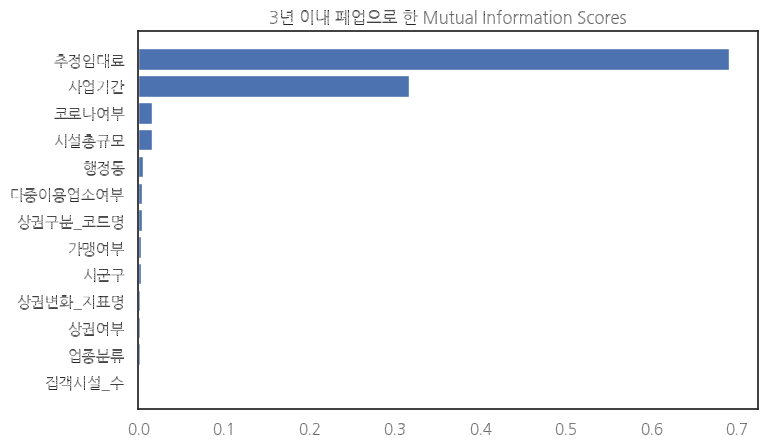

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("3년 이내 폐업으로 한 Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="1년이내 폐업으로 한 MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y2, discrete_features)
mi_scores  # show a few features with their MI scores

추정임대료       0.312828
사업기간        0.278774
시설총규모       0.021152
행정동         0.010508
집객시설_수      0.009551
상권변화_지표명    0.007243
시군구         0.004646
상권구분_코드명    0.003768
업종분류        0.002849
다중이용업소여부    0.002065
가맹여부        0.001980
상권여부        0.000134
코로나여부       0.000000
Name: 1년이내 폐업으로 한 MI Scores, dtype: float64

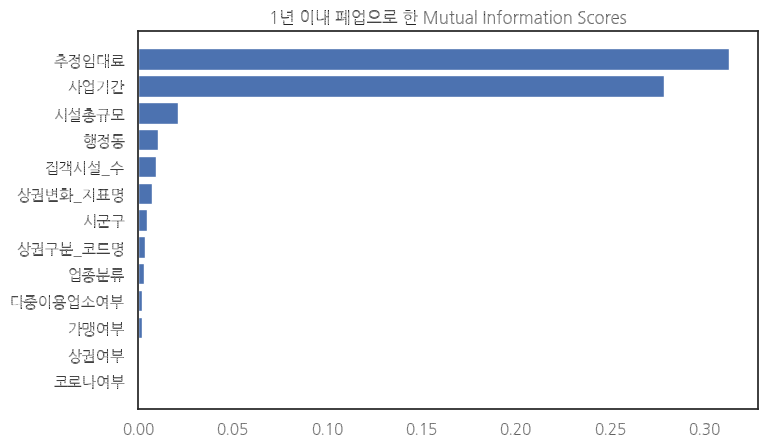

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("1년 이내 폐업으로 한 Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,사업기간,코로나여부,상권변화_지표명,상권구분_코드명,집객시설_수,시군구,행정동,상권여부
0,0,29,1129464000,0,0,569,0,0,0,0,0,0,1
1,0,72,755446500,0,1,457,0,0,1,1,1,1,0
2,0,36,306059600,1,0,2005,0,1,1,2,2,2,1
3,0,126,1018635300,0,0,2005,0,1,0,3,2,3,1
4,0,47,426857760,0,0,261,0,0,1,4,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56720,1,153,941257500,0,0,182,1,2,1,12,23,392,1
56721,0,37,226791600,1,0,182,1,2,1,34,23,393,0
56722,1,163,2815278600,0,3,181,1,2,0,10,21,81,1
56723,1,342,3382054200,0,0,181,1,2,0,10,21,81,1


In [ ]:
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,10.195549,시군구
1,5.813617,행정동
2,4.885637,상권여부
3,3.724046,사업기간
4,3.372878,상권변화_지표명
5,3.195841,시설총규모
6,2.086054,집객시설_수
7,1.962694,업종분류
8,1.892721,코로나여부
9,1.891268,상권구분_코드명
